<a href="https://colab.research.google.com/github/wynn918/ML/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('train.csv')

In [ ]:
data.info()

In [5]:
data.drop(['Cabin','Name','Ticket'],inplace=True,axis=1)

In [7]:
#process the missing value
data['Age']=data['Age'].fillna(data['Age'].mean())
data=data.dropna()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


In [11]:
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data['Embarked'].apply(lambda x: labels.index(x)) #S-0,C-1,Q-2

In [12]:
data.loc[:,'Sex'] = (data['Sex'] == 'male').astype('int')

In [17]:
x = data.iloc[:,data.columns != 'Survived']
y = data.iloc[:,data.columns == 'Survived']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3)

In [19]:
#rearrange the index order
for i in [Xtrain, Xtest, Ytrain, Ytest]:
  i.index = range(i.shape[0]) 

In [21]:
clf = DecisionTreeClassifier(random_state=10)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.7265917602996255

In [26]:
score = cross_val_score(clf,x,y,cv=10).mean()
score

0.7514683350357507

0.8143896833503576


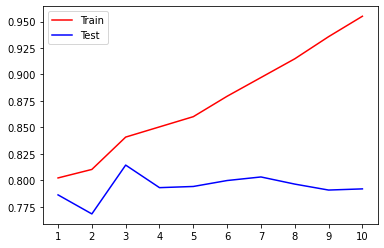

In [30]:
tr=[]
te=[]

for i in range(10):
  clf = DecisionTreeClassifier(random_state=10
                               ,max_depth=i+1
                               )
  clf = clf.fit(Xtrain, Ytrain)
  score_tr = clf.score(Xtrain, Ytrain)
  score_te = cross_val_score(clf,x,y,cv=10).mean()
  tr.append(score_tr)
  te.append(score_te)

print(max(te))

plt.plot(range(1,11),tr,color='red',label='Train')
plt.plot(range(1,11),te,color='blue',label='Test')
plt.xticks(range(1,11))
plt.legend()
plt.show()

0.8166624106230849


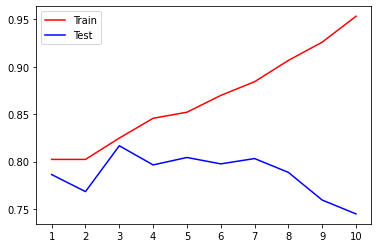

In [31]:
tr=[]
te=[]

for i in range(10):
  clf = DecisionTreeClassifier(random_state=10
                               ,max_depth=i+1
                               ,criterion='entropy'
                               )
  clf = clf.fit(Xtrain, Ytrain)
  score_tr = clf.score(Xtrain, Ytrain)
  score_te = cross_val_score(clf,x,y,cv=10).mean()
  tr.append(score_tr)
  te.append(score_te)

print(max(te))

plt.plot(range(1,11),tr,color='red',label='Train')
plt.plot(range(1,11),te,color='blue',label='Test')
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [39]:
#Grid Search
import numpy as np
gini_threholds=np.linspace(0,0.5,50) #generate 50 numbers from 0-0.5 with order 

parameters = {'criterion':('gini','entropy')
              ,'splitter':('best','random')
              ,'max_depth':[*range(1,5)]
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':[*np.linspace(0,0.5,50)] 
}


clf = DecisionTreeClassifier(random_state=10)
GS = GridSearchCV(clf,parameters,cv=10)
GS = GS.fit(Xtrain,Ytrain)

In [40]:
GS.best_params_ #the best parameter combination

{'criterion': 'gini',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [41]:
GS.best_score_ 

0.830926779313876